##
Import packages: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##
Call matplotlib inline

In [2]:
%matplotlib inline

##
read in files and check data

In [3]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv',nrows=6868)

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [5]:
internet_df=pd.read_csv('../data/internet_use.csv',nrows=4495)

In [6]:
print(gdp_df.info())
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB
None


**##
check size of dataframes** 
1. gdp_df has 4 columns and 6,868 rows (not including headers)
2. Internet_df has 4 columns and 4495 rows (not including headers) 

In [7]:
print(gdp_df.tail(10))
print(internet_df.tail(10))

     Country or Area  Year        Value  Value Footnotes
6858        Zimbabwe  1999  3600.849291              NaN
6859        Zimbabwe  1998  3653.920016              NaN
6860        Zimbabwe  1997  3580.048793              NaN
6861        Zimbabwe  1996  3520.430146              NaN
6862        Zimbabwe  1995  3226.413930              NaN
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              NaN
     Country or Area  Year     Value  Value Footnotes
4485        Zimbabwe  2002  3.994356              NaN
4486        Zimbabwe  2001  0.799846              NaN
4487        Zimbabwe  2000  0.401434              NaN
4488        Zimbabwe  1999  0.161676              NaN
4489        Zimbabwe  1998  0.081648              NaN
4490        Zimbabwe  1997  0.033080             

**##
Drop column from both tables. Used inplace to replace tables rather than duplicate them.** 

In [8]:
gdp_df.drop(['Value Footnotes'], axis=1, inplace=True)

In [9]:
internet_df.drop(['Value Footnotes'], axis=1, inplace=True)

In [10]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB
None


In [11]:
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB
None


**##
Rename columns in both tables. Used inplace to replace column names instead of create duplicate table. Printed each table to check results.** 

In [12]:
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)
print(gdp_df.info())
internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'}, inplace=True)
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB
None


**##
Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.
Initially used a concat with outer and it resulted in empty dataframes.**  

In [13]:
gdp_and_internet_use=pd.merge(gdp_df,internet_df, how='left', on=['Country','Year'])
print(gdp_and_internet_use.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6868 non-null   object 
 1   Year                6868 non-null   int64  
 2   GDP_Per_Capita      6868 non-null   float64
 3   Internet_Users_Pct  3458 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 268.3+ KB
None


**##Look at the first five rows of your new DataFrame to confirm it merged correctly.**

In [14]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


**##
Look at the last five rows to make sure the data is clean and as expected.**

In [15]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6863,Zimbabwe,1994,3263.934978,0.001739
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,0.000000


**##
Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.**

In [17]:
newdf= gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2009, 2004, 2014])]
print(newdf)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
5     Afghanistan  2014     2102.385234            6.390000
10    Afghanistan  2009     1758.904043            3.550000
15    Afghanistan  2004     1200.278256            0.105809
23        Albania  2014    11623.866679           60.100000
28        Albania  2009    10346.864199           41.200000
...           ...   ...             ...                 ...
6818       Zambia  2009     2917.516220            6.310000
6823       Zambia  2004     2261.766537            2.013550
6843     Zimbabwe  2014     2955.240287           19.890000
6848     Zimbabwe  2009     1925.364381           11.360000
6853     Zimbabwe  2004     2480.859342            6.564045

[708 rows x 4 columns]


**##
Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.
Created new dfs, checked to see if filter worked.**

In [18]:
year_2004=gdp_and_internet_use[(gdp_and_internet_use['Year'] == 2004)]
#year column is integer so it can't have quotes around it. 
year_2009=gdp_and_internet_use[(gdp_and_internet_use['Year'] == 2009)]
year_2014=gdp_and_internet_use[(gdp_and_internet_use['Year'] == 2014)]
print(year_2014.head())

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
5            Afghanistan  2014     2102.385234                6.39
23               Albania  2014    11623.866679               60.10
53               Algeria  2014    11512.705405               18.09
83                Angola  2014     8239.828837               21.26
113  Antigua and Barbuda  2014    18104.241470               64.00


**##
Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).**

In [19]:
maxpct=year_2014['Internet_Users_Pct'].max(skipna=True)
print('2014 Highest %:'), print(maxpct)
year_2014.loc[year_2014['Internet_Users_Pct']==maxpct, 'Country']

2014 Highest %:
98.16


2625    Iceland
Name: Country, dtype: object

**##
Which country had the lowest percentage of internet users in 2014? What was the percentage?**

In [20]:
minpct=year_2014['Internet_Users_Pct'].min(skipna=True)
print('2014 Lowest %:'), print(minpct)
year_2014.loc[year_2014['Internet_Users_Pct']==minpct, 'Country']

2014 Lowest %:
1.14


6219    Timor-Leste
Name: Country, dtype: object

**##Repeat for 2004**

In [21]:
#2004 max
max2004=year_2004['Internet_Users_Pct'].max(skipna=True)
print('2004 Highest %:'), print(max2004)
print('2004 Highest Country:'), print(year_2004.loc[year_2004['Internet_Users_Pct']==max2004, 'Country'])
#2004 min
min2004=year_2004['Internet_Users_Pct'].min(skipna=True)
print('2004 Lowest %:'), print(min2004)
print('2004 Lowest Country:'), print(year_2004.loc[year_2004['Internet_Users_Pct']==min2004, 'Country'])

2004 Highest %:
83.89
2004 Highest Country:
6019    Sweden
Name: Country, dtype: object
2004 Lowest %:
0.024337392002823
2004 Lowest Country:
4342    Myanmar
Name: Country, dtype: object


(None, None)

**#Repeat for 2009**

In [22]:
#2009 max
max2009=year_2009['Internet_Users_Pct'].max(skipna=True)
print('2009 Highest %:'), print(max2009)
print('2009 Highest Country:'), print(year_2009.loc[year_2009['Internet_Users_Pct']==max2009, 'Country'])
#2009 min
min2009=year_2009['Internet_Users_Pct'].min(skipna=True)
print('2009 Lowest %:'), print(min2009)
print('2009 Lowest Country:'), print(year_2009.loc[year_2009['Internet_Users_Pct']==min2009, 'Country'])

2009 Highest %:
93.0
2009 Highest Country:
2630    Iceland
Name: Country, dtype: object
2009 Lowest %:
0.185251509799805
2009 Lowest Country:
6224    Timor-Leste
Name: Country, dtype: object


(None, None)

**##Which country had the highest gdp per capita in 2014? What was the gdp per capita?**

In [24]:
max2014country=year_2014.loc[year_2014['GDP_Per_Capita']==year_2014['GDP_Per_Capita'].max(skipna=True), 'Country']
print(max2014country)
max2014gdp=year_2014['GDP_Per_Capita'].max(skipna=True)
print('Highest GDP_Per_Capita:'), print(max2014gdp)

3721    Macao SAR, China
Name: Country, dtype: object
Highest GDP_Per_Capita:
156514.133849784


(None, None)

**#Which country had the lowest gdp per capita in 2014? What was the gdp per capita?**

In [26]:
min2014country=year_2014.loc[year_2014['GDP_Per_Capita']==year_2014['GDP_Per_Capita'].min(skipna=True), 'Country']
print(min2014country)
min2014gdp=year_2014['GDP_Per_Capita'].min(skipna=True)
print('Lowest GDP_Per_Capita:'), print(min2014gdp)

1047    Central African Republic
Name: Country, dtype: object
Lowest GDP_Per_Capita:
822.610457816902


(None, None)

**Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita**

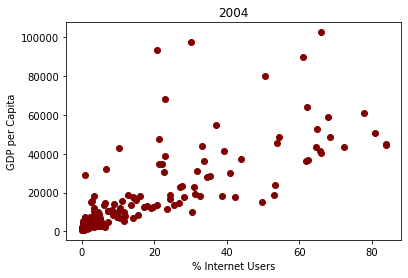

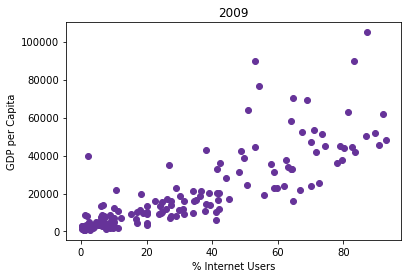

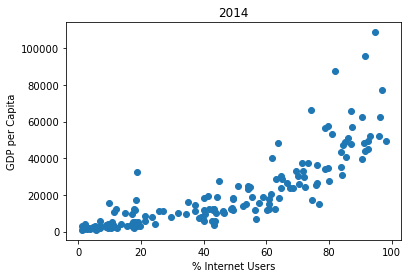

In [34]:
plt.scatter(year_2004.Internet_Users_Pct,year_2004.GDP_Per_Capita, c='maroon')
plt.title('2004')
plt.xlabel('% Internet Users')
plt.ylabel('GDP per Capita')
plt.show()
plt.scatter(year_2009.Internet_Users_Pct,year_2009.GDP_Per_Capita, c='rebeccapurple')
plt.title('2009')
plt.xlabel('% Internet Users')
plt.ylabel('GDP per Capita')
plt.show()
plt.scatter(year_2014.Internet_Users_Pct,year_2014.GDP_Per_Capita)
plt.title('2014')
plt.xlabel('% Internet Users')
plt.ylabel('GDP per Capita')
plt.show()

**Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.**

1. % of internet users at lower GDP per capita has risen
2. There is a positive correlation between GDP per capita and internet users in the country 

**Look at the distribution of gdp per capita values for 2014. Is it unimodal?**

1. Yes, there is a singular highest value in the data set 

**What are the top 5 countries in terms of internet use in 2014?**

In [37]:
sorted_2014 = year_2014.sort_values(by='Internet_Users_Pct', ascending=False)
print(sorted_2014.head())

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625     Iceland  2014    49652.149500               98.16
561      Bermuda  2014    77361.104881               96.80
4648      Norway  2014    62589.373548               96.30
1452     Denmark  2014    52214.537753               95.99
3691  Luxembourg  2014   108760.916030               94.67


**Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.**

In [48]:
top_5_internet=newdf[newdf['Country'].isin(['Iceland','Bermuda','Norway','Denmark','Luxembourg'])]
print(top_5_internet.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 561 to 4658
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             15 non-null     object 
 1   Year                15 non-null     int64  
 2   GDP_Per_Capita      15 non-null     float64
 3   Internet_Users_Pct  15 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 600.0+ bytes
None


**Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?**

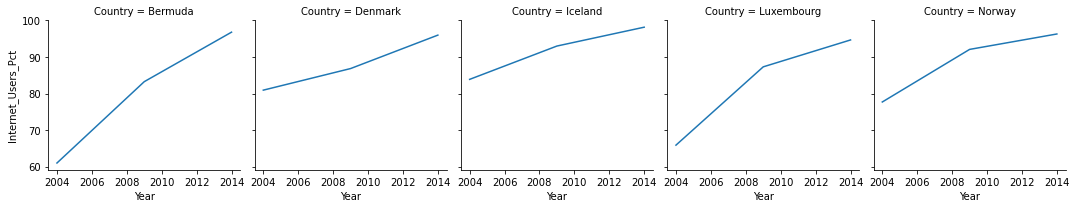

In [74]:
grids_top=sns.FacetGrid(top_5_internet, col='Country')
grids_top.map(sns.lineplot, 'Year','Internet_Users_Pct')
plt.show()

**Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?**

In [67]:
sorted_2014_low = year_2014.sort_values(by='Internet_Users_Pct', ascending=True)
print(sorted_2014_low.head())

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
6219   Timor-Leste  2014     3264.568070                1.14
827        Burundi  2014      886.235777                1.38
2326        Guinea  2014     2061.760973                1.72
4528         Niger  2014     1127.615541                1.95
5434  Sierra Leone  2014     1997.511853                2.10


In [68]:
bottom_5_internet=newdf[newdf['Country'].isin(['Timor-Leste','Burundi','Guinea','Niger','Sierra Leone'])]
print(bottom_5_internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 827 to 6229
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             15 non-null     object 
 1   Year                15 non-null     int64  
 2   GDP_Per_Capita      15 non-null     float64
 3   Internet_Users_Pct  14 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 600.0+ bytes
None


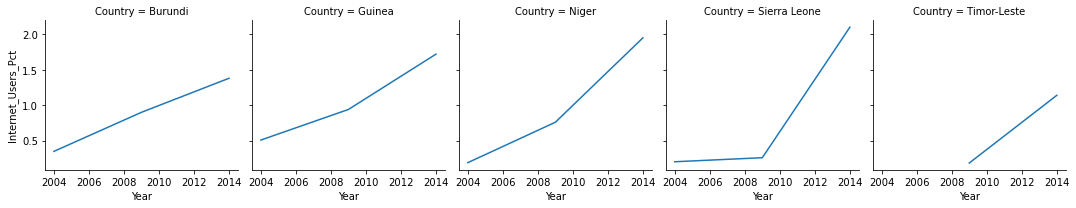

In [75]:
grids_low=sns.FacetGrid(bottom_5_internet, col='Country')
grids_low.map(sns.lineplot,'Year','Internet_Users_Pct')
plt.show()

**Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.**

**Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.**

**Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?**

In [77]:
gdp_high = year_2014.sort_values(by='GDP_Per_Capita', ascending=False)
print(gdp_high.head(10))

                   Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721      Macao SAR, China  2014   156514.133850                 NaN
3691            Luxembourg  2014   108760.916030               94.67
5138                 Qatar  2014    95578.416973               91.49
5464             Singapore  2014    87808.663157               82.00
561                Bermuda  2014    77361.104881               96.80
1033        Cayman Islands  2014    66207.447230               74.10
6039           Switzerland  2014    65813.952509               87.00
737                 Brunei  2014    64192.234008                 NaN
4648                Norway  2014    62589.373548               96.30
6517  United Arab Emirates  2014    62378.657439               90.40
